In [36]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [33]:
### data sources ###
data_dir = '/Users/gbromley/data/wrf_output/'
t2m_fallow = xr.open_dataset(data_dir+'modland/T2_fallow_mon.nc')
t2m_non_fallow =  xr.open_dataset(data_dir+'test/'+'T2Q2_nonfallow_mon.nc')

season = 'MJ'
months=[5,6]
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [38]:
fallow_mj = t2m_fallow['T2'].sel(XTIME=extract_months(t2m_fallow['T2']['XTIME.month'],months[0],months[-1])).mean(dim='XTIME')

nonfallow_mj = t2m_non_fallow['T2'].sel(XTIME=extract_months(t2m_non_fallow['T2']['XTIME.month'], months[0],months[-1])).mean(dim='XTIME')


diff =  nonfallow_mj - fallow_mj 

In [51]:
lon.min()

-124.84863

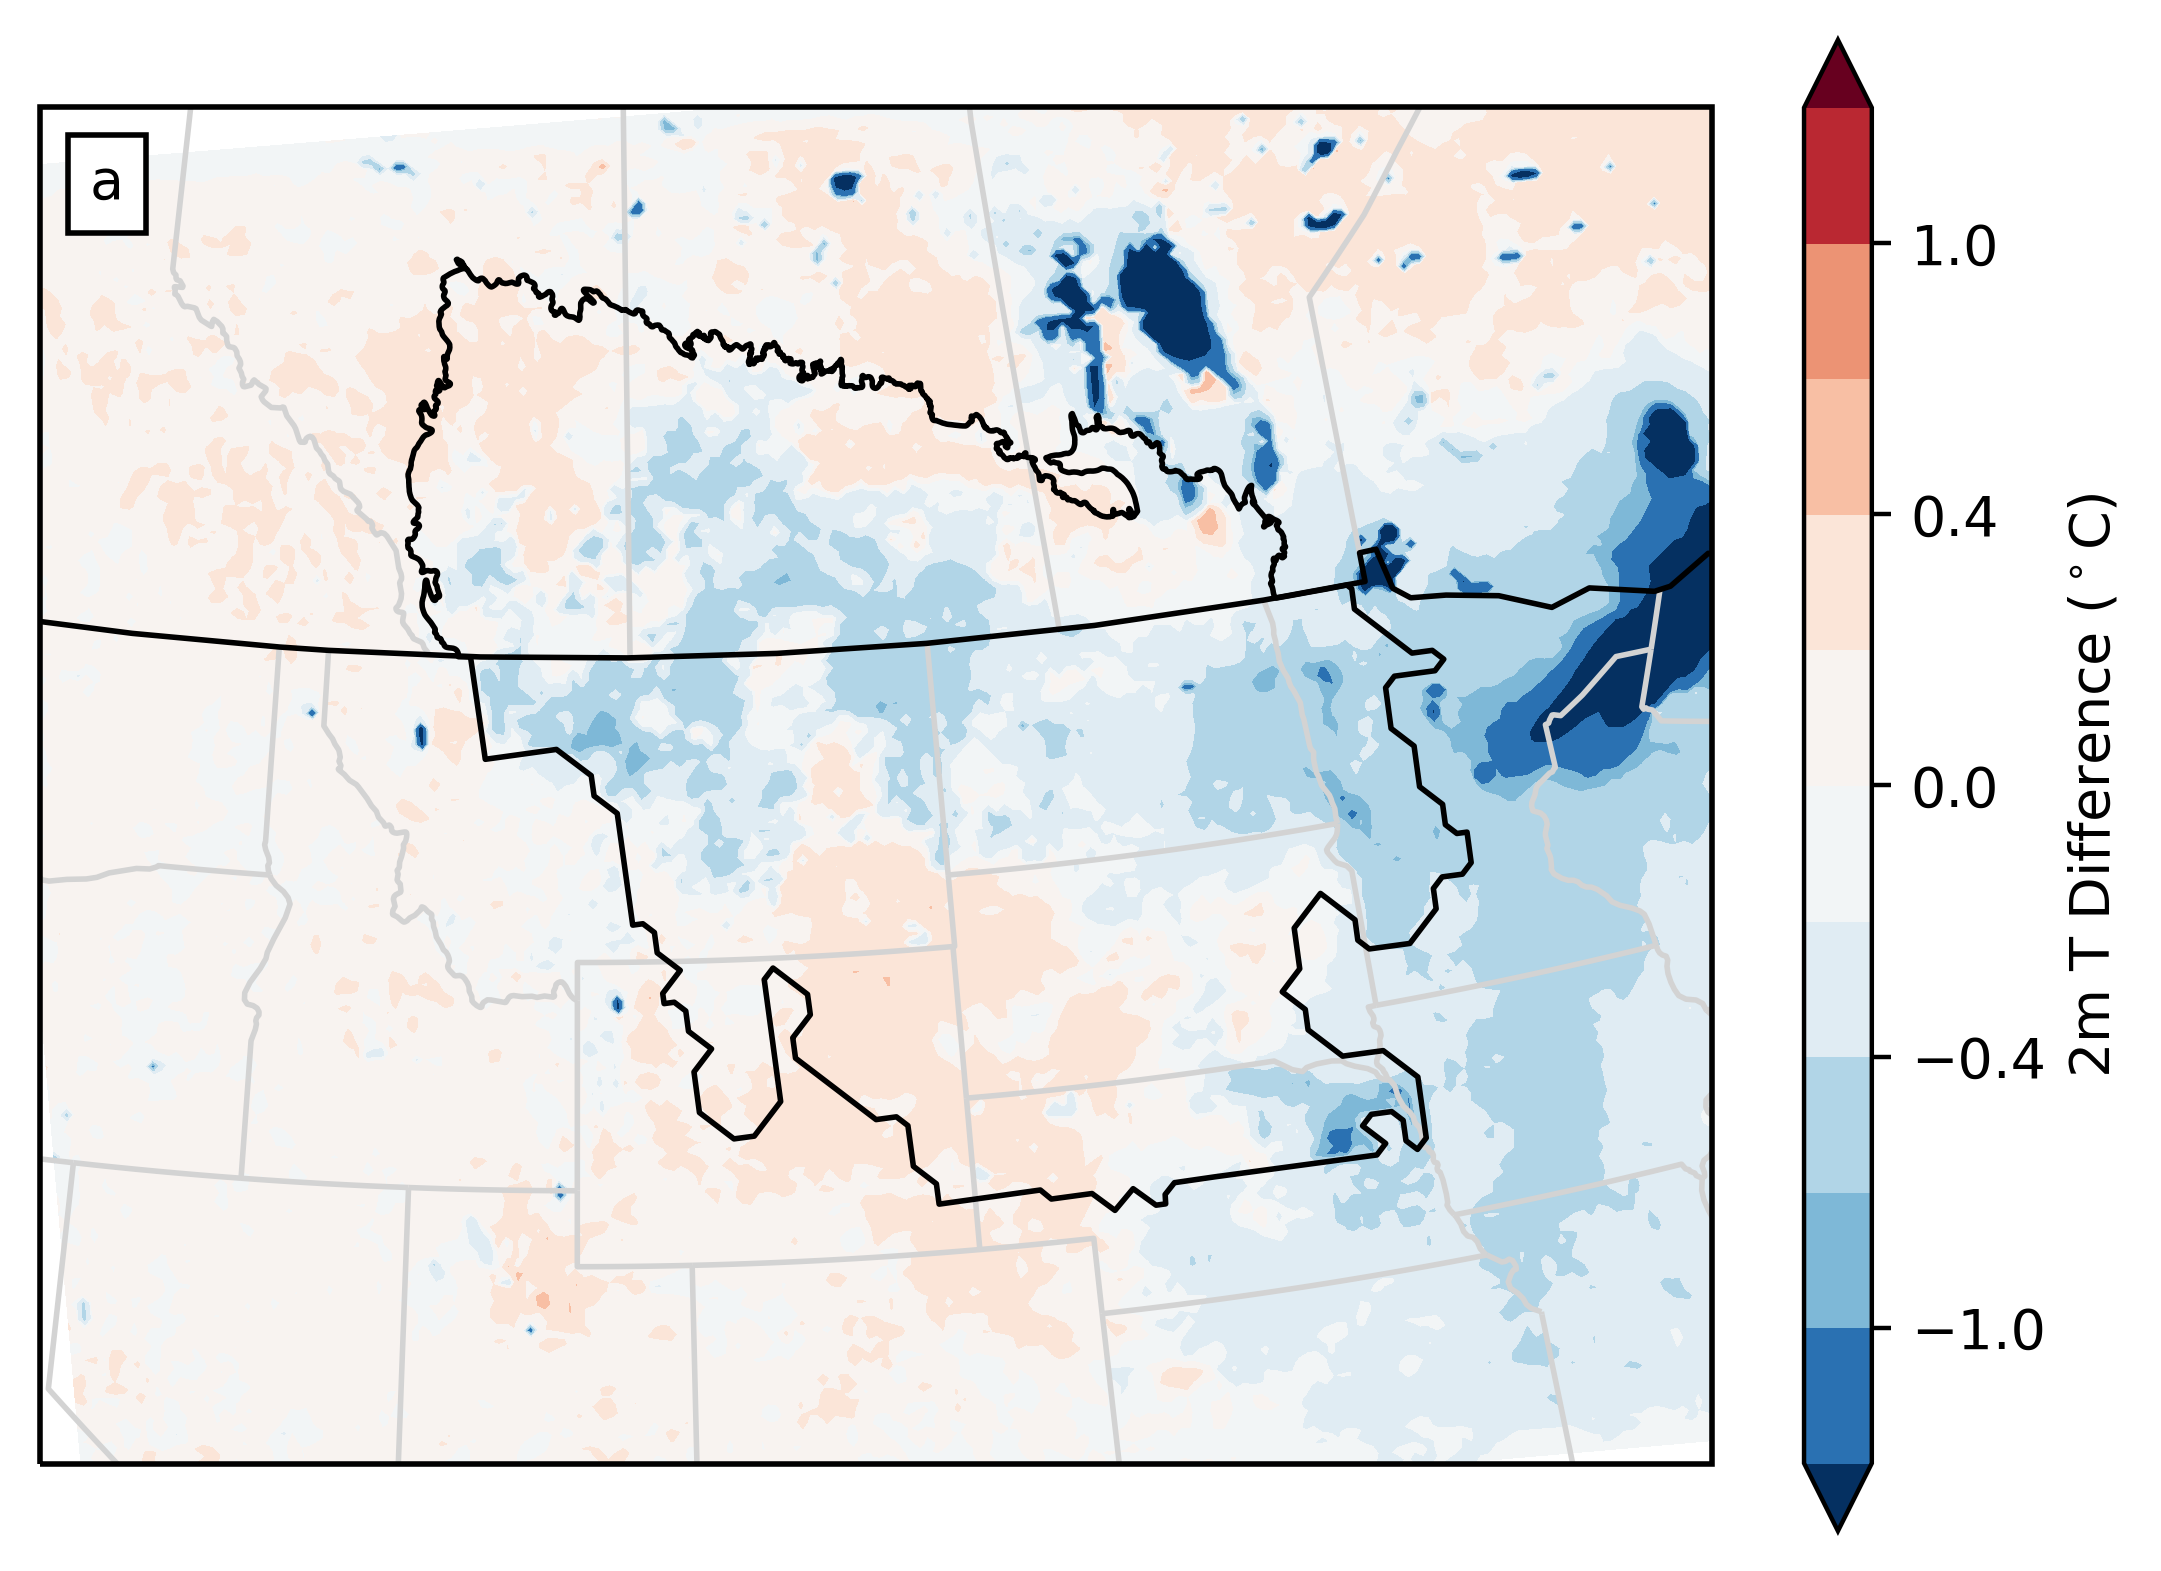

In [53]:

levs = [-2,-1,-0.8,-0.4,-.1,0,.1,.4,.8,1,2]

fig = plt.figure(1,figsize=(13,7), dpi=400.0)
projection = ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None)
ax1 = plt.subplot(1,2,1, projection = projection)

plot = plt.contourf(diff.XLONG,diff.XLAT,diff[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='RdBu_r', extend='both')




ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='lightgray')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)
anchored_text = AnchoredText("a", loc=2)
ax1.add_artist(anchored_text)
ax1.title.set_visible(False)
cb = plt.colorbar(plot, cmap='RdBu_r',fraction=0.037)
cb.set_label('2m T Difference ($^\circ$C)',fontsize=10)


In [29]:
### Ouput Data
month = ['October','November','December','January','February','March','April','May','June','July','August','September']

### TO DO ###
# Lat/Lon arrays from WRF are 2d, so need to transform to 1d before this array can be created
lat = np.array(t2m_fallow['T2'].XLAT)[:,0]
lon = np.array(t2m_fallow['T2'].XLONG)[0,:]
vals = np.empty(shape=(12,len(lat),len(lon)))
vals[:,:,:] = np.nan
diff_boxplot = xr.DataArray(vals,coords=[month,lat,lon],dims=['month','lat','lon'])
diff_boxplot.name = 'Fallow - NonFallow'
diff_boxplot.attrs['units'] = 'Celsius'


ngp_mask = xr.open_dataset('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/ngp_mask.nc')
ngp_mask = ngp_mask.rename({'__xarray_dataarray_variable__':'ngp'})

lat = np.array(ngp_mask['ngp'].XLAT)[:,0]
lon = np.array(ngp_mask['ngp'].XLONG)[0,:]
vals = np.empty(shape=(len(lat),len(lon)))
vals[:,:] = np.nan
mask = xr.DataArray(ngp_mask['ngp'].values,coords=[lat,lon],dims=['lat','lon'])
mask.name = 'NGP WRF MASK'


AttributeError: 'DataArray' object has no attribute 'XLAT'

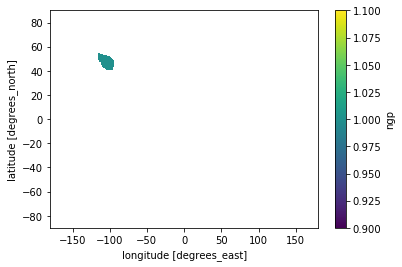

In [31]:
ngp_mask['ngp'].plot()

In [17]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for month in months:
    diff_boxplot[month] = t2m_fallow['T2'].isel(XTIME=month) - t2m_non_fallow['T2'].isel(XTIME=month)


In [18]:

ngp = diff_boxplot.where(mask==1)
test = ngp.stack(z=('lat','lon'))
season_values = test.groupby('month').apply(lambda x: x.dropna(dim='z'))


In [ ]:
diff_boxplot()

In [ ]:
diff_boxplot.where(mask==1)

Text(0, 0.5, 'Temperature Difference $^\\circ$C')

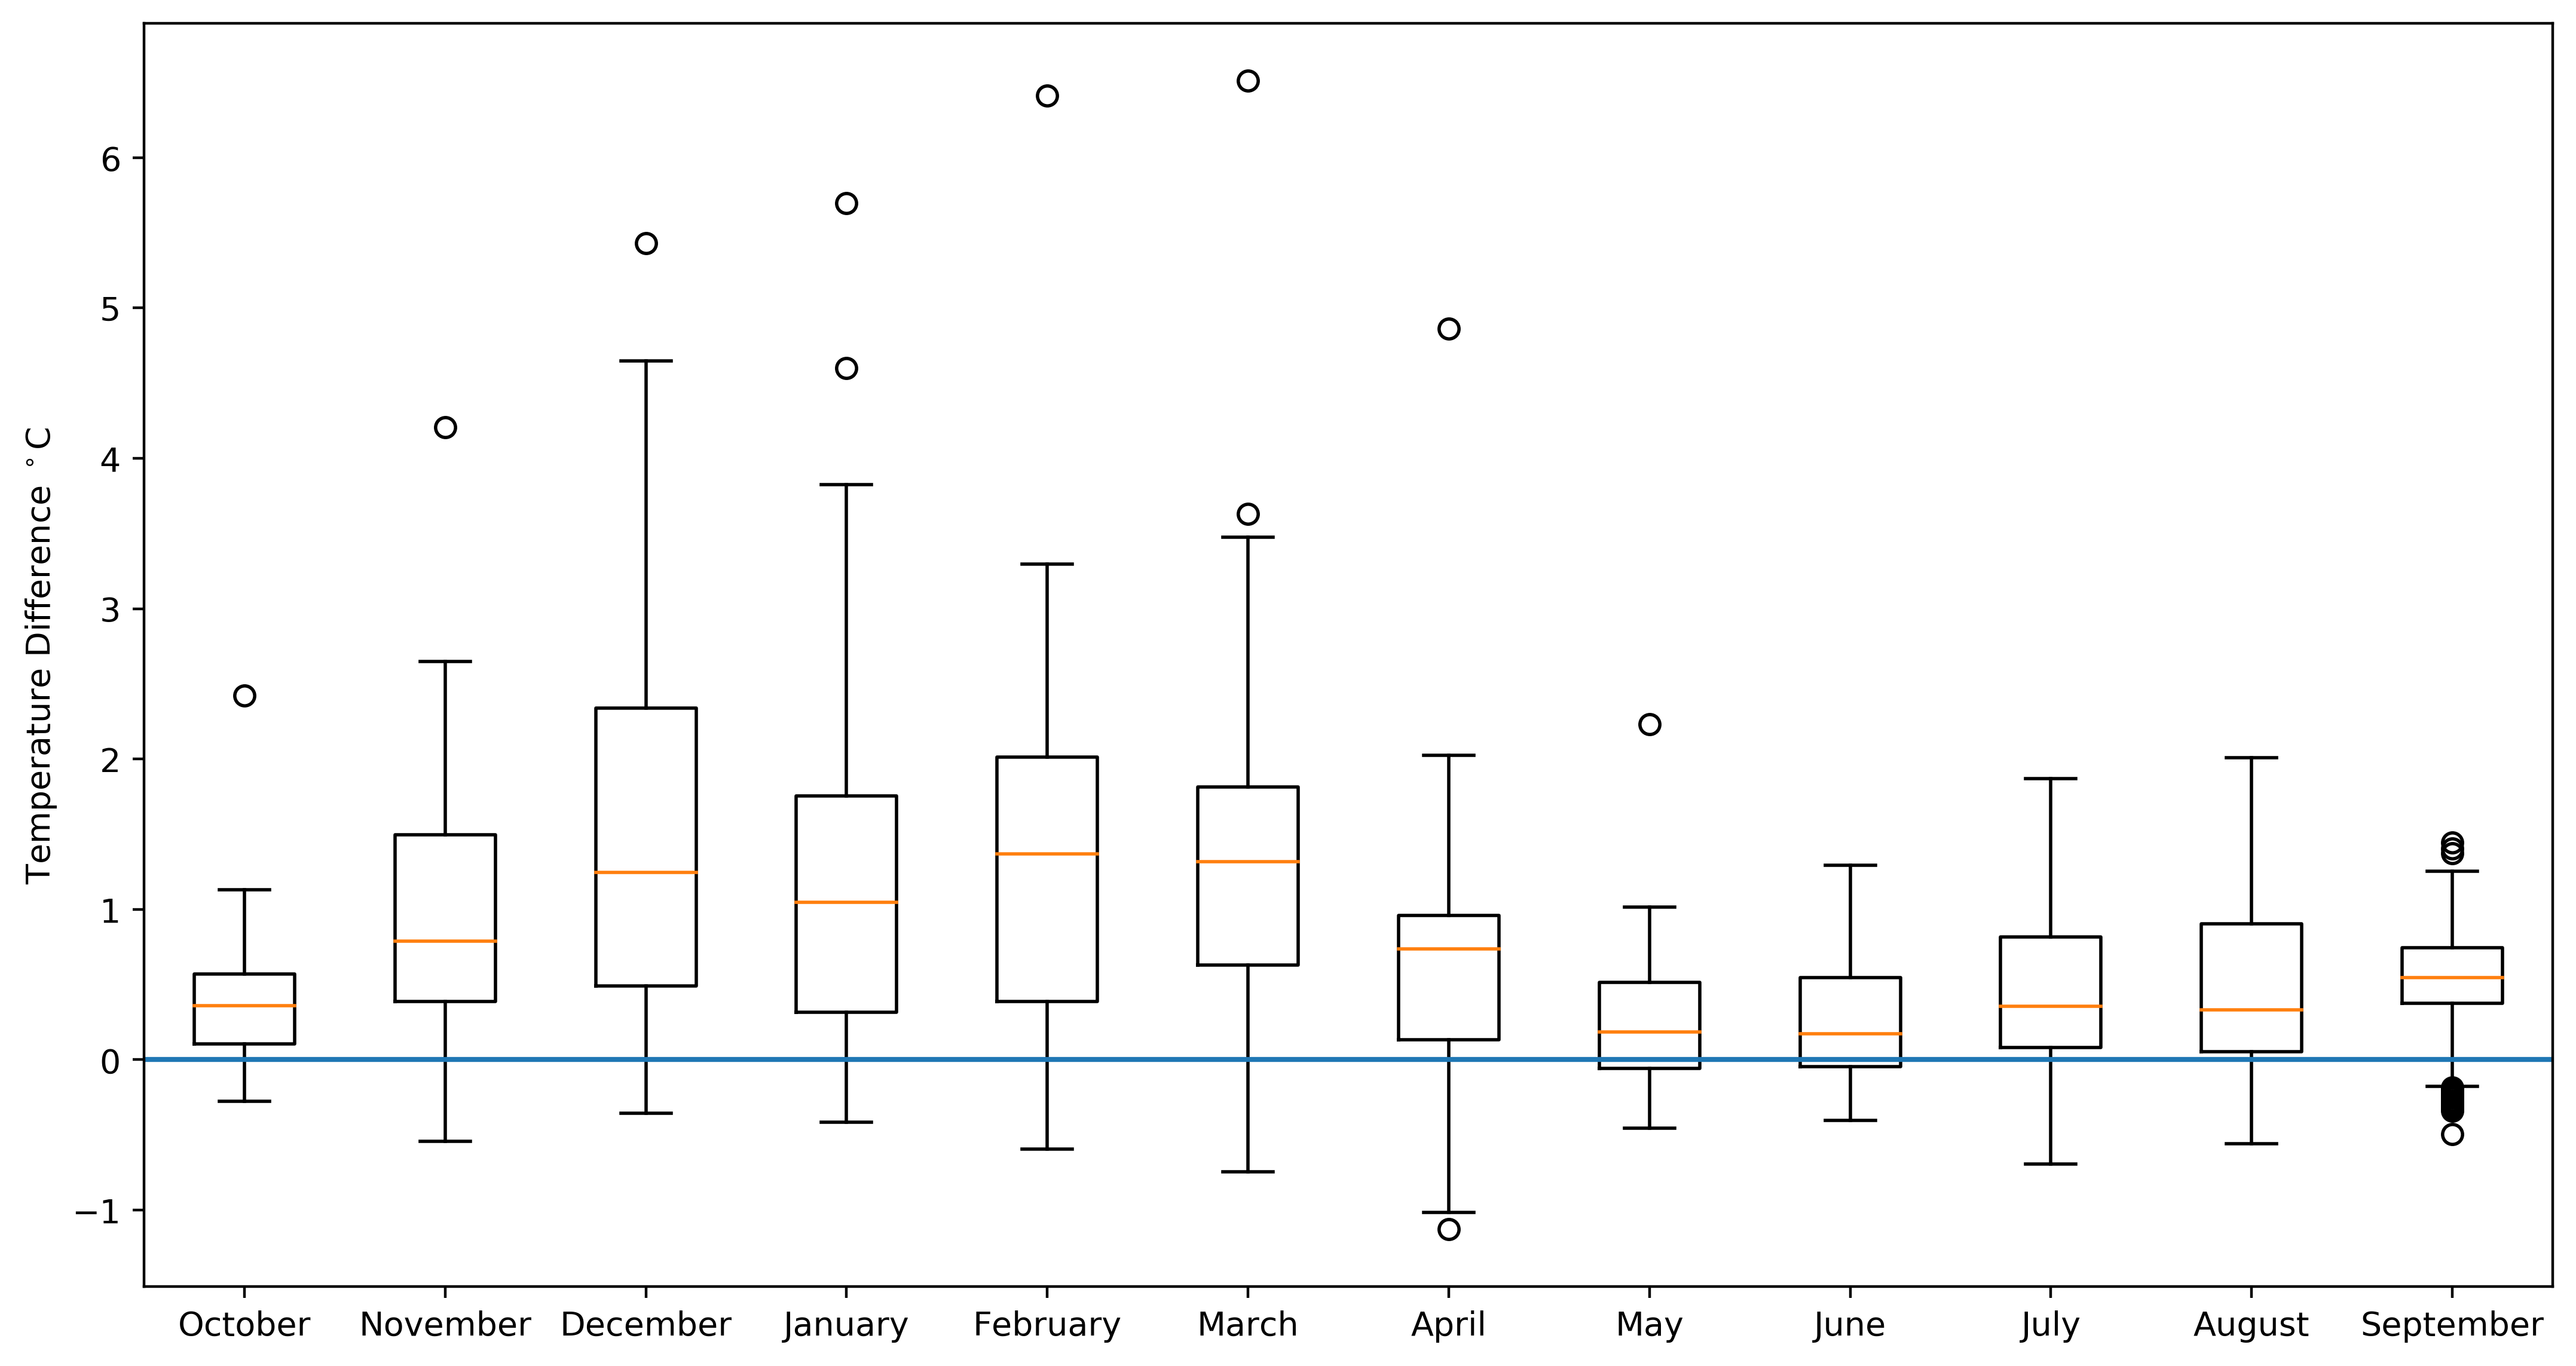

In [19]:
month = ['October','November','December','January','February','March','April','May','June','July','August','September']
fig, ax = plt.subplots(ncols=1)
fig.set_dpi(400)
fig.set_size_inches((13,7))
pos = np.array(range(len(season_values))) + 1
plt.boxplot(season_values, positions=pos)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], month)
ax.axhline(0)
ax.set_ylabel('Temperature Difference $^\circ$C')

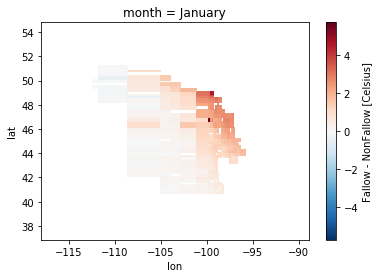

In [21]:
ngp.sel(month='January').plot()

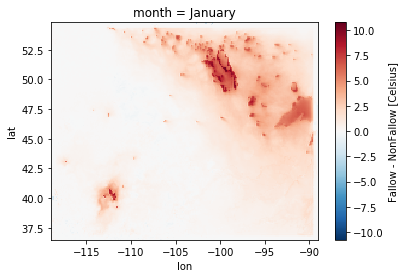

In [22]:
diff_boxplot.sel(month='January').plot()